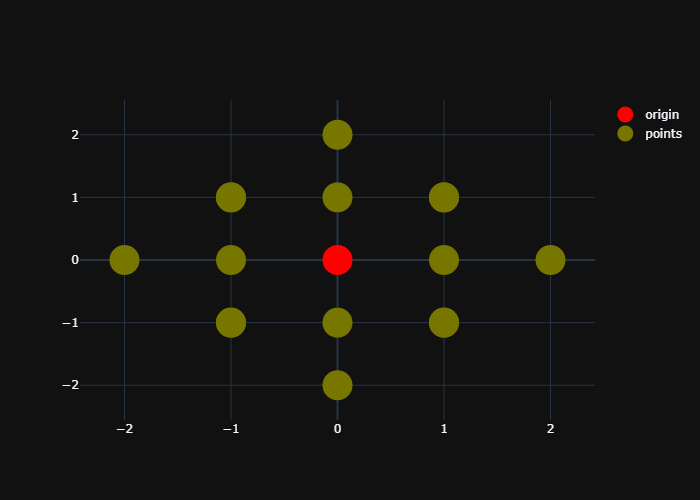

In [1]:
from itertools import chain
from icecream import ic
import numpy as np

a = lambda x, y: np.array((x, y), dtype=int)

def create_radius(origin: np.ndarray, expand_range: int, include_origin=False):
    def make_line(origin: np.ndarray, dir: np.ndarray, times: int):
        for i in range(1, times + 1):
            yield origin + (dir * i)
    points = [origin] if include_origin else []
    range_left = expand_range
    allowed_expansion_range = 1
    n = s = e = w = origin
    while range_left > 0:
        n = n + (0, 1)
        s = s - (0, 1)
        e = e + (1, 0)
        w = w - (1, 0)
        points.extend((n, s, e, w))
        range_left -= 1
        if range_left <= 0:
            break
        current_side_expansion = allowed_expansion_range if range_left - allowed_expansion_range > 0 else range_left
        points.extend(make_line(n, a(-1, 0), current_side_expansion))
        points.extend(make_line(n, a(1, 0), current_side_expansion))
        points.extend(make_line(s, a(-1, 0), current_side_expansion))
        points.extend(make_line(s, a(1, 0), current_side_expansion))
        points.extend(make_line(e, a(0, -1), current_side_expansion))
        points.extend(make_line(e, a(0, 1), current_side_expansion))
        points.extend(make_line(w, a(0, -1), current_side_expansion))
        points.extend(make_line(w, a(0, 1), current_side_expansion))
        range_left -= current_side_expansion
        allowed_expansion_range += 1

    return points


ORIGIN_POINT = a(0, 0)
line = create_radius(ORIGIN_POINT, 3, include_origin=False)
import plotly.graph_objs as go

points = {'x': [l[0] for l in line], 'y': [l[1] for l in line]}
fig = go.Figure()
fig.add_scatter(name='origin', x=[ORIGIN_POINT[0]], y=[ORIGIN_POINT[1]], mode='markers',
                marker={'color': 'red', 'size': 30})
fig.add_scatter(name='points', x=points['x'], y=points['y'], mode='markers', marker={'color': '#770', 'size': 30}, )
fig.update_layout()
fig.show(renderer='png')